### Plotting the input data

In [166]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-white')
import numpy as np
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [39]:
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

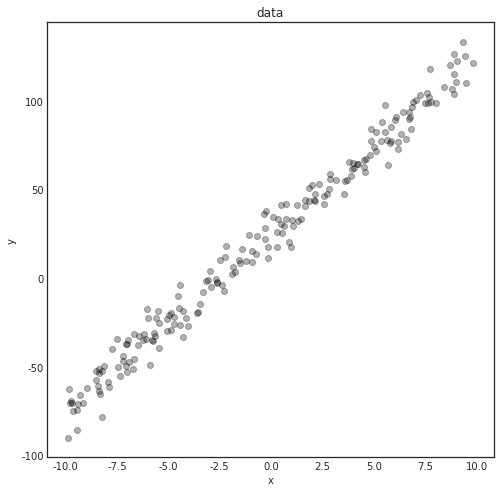

In [40]:
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.title('data')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_data, y_data, alpha=0.3,c='k')
plt.show()


### Plotting the linear regression result

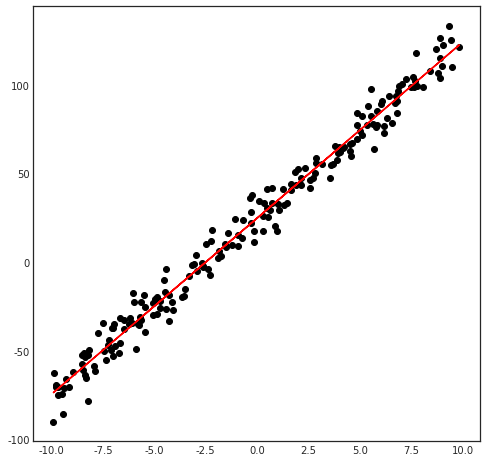

In [41]:
m, b = np.polyfit(x_data, y_data, 1)
plt.figure(figsize=(8, 8))
plt.plot(x_data, y_data, 'o', c='k')
#m=theta1 b=theta0
plt.plot(x_data, m*x_data +b, c='r')


###    Plotting the energy surface

In [204]:
theta = np.array([-30,-30])

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

def gradient_descent(theta,X,y,alpha = .03, num_iters=200):
    
    #변수초기화
    m,n = X.shape
    cost_history = []
    theta_0_history, theta_1_history = [], [] #For plotting afterwards
    
    
    for i in range(num_iters):
        
        for j in range(n):
            #좌표표현
            h = X @ theta 
            gradient =  (X[:,j] @ (h-y))
            theta[j] = theta[j] - alpha * gradient
            
            #값들 배열저장
            cost_history.append(compute_cost(X,y,theta))
            theta_0_history.append(theta[0,0])
            theta_1_history.append(theta[1,0])
                       
    return theta ,cost_history, theta_0_history, theta_1_history

### plotting the energy surface

No handles with labels found to put in legend.


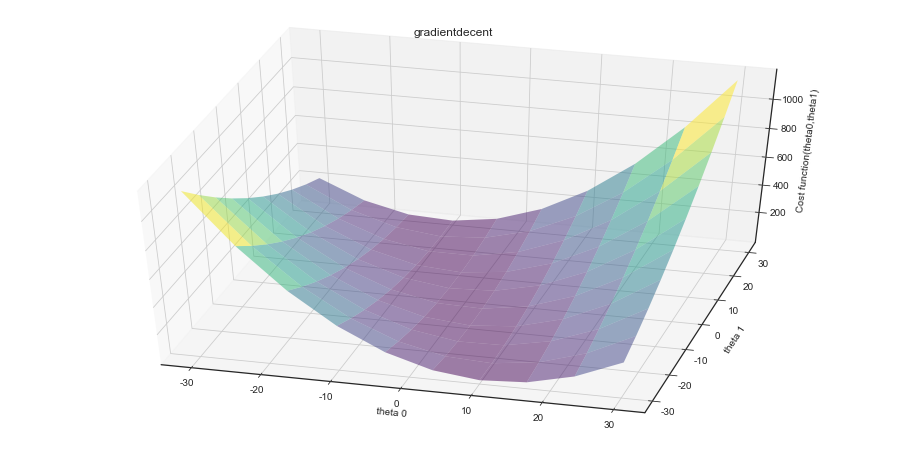

In [210]:
x_data = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)
y_noise = y_noise - y_noise.mean()
X = np.vstack((2*x,x**2)).T
initial_theta = np.array([-30,-30.]).reshape(-1,1)

#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(np.linspace(-30,30,10),np.linspace(-30,30,10))

#Computing the cost function for each theta combination
zs = np.array(  [compute_cost(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
#Reshaping the cost values    
Z = zs.reshape(T0.shape)


#Computing the gradient descent
theta_result_c,cost_history_c, theta_0_c, theta_1_c = gradient_descent(initial_theta,X,y_noise, alpha = .009) 

#Angles needed for quiver plot
anglesx = np.array(theta_0_c)[1:] - np.array(theta_0_c)[:-1]
anglesy = np.array(theta_1_c)[1:] - np.array(theta_1_c)[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 1, cstride = 1, cmap='viridis', alpha=0.5)
 ax.plot(theta_0_c,theta_1_c,cost_history_c, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost function(theta0,theta1)')
ax.set_title('gradientdecent')
ax.view_init(45, -7a5)
ax.legend()